https://www.kaggle.com/competitions/playground-series-s3e8

This dataset contains information on various features of gemstones, including their dimensions: (x, y, z), carat, table, depth, color, clarity, and cut.

- carat --> physical weight measured in metric carats
- table --> Width of the top of the diamond relative to widest point
- depth --> The depth of is height (in mm) measured from the culet (bottom) to the table (top)
- color --> color of the gemstone
- clarity --> clarity of the gemstone
- cut --> quality of the cut
- x --> length in mm
- y --> width in mm
- z --> depth in mm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import category_encoders as ce
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE, SVMSMOTE
import time
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, Lasso, LassoCV, Ridge, RidgeCV, HuberRegressor, PassiveAggressiveRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.dummy import DummyRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor,
    HistGradientBoostingRegressor,
    GradientBoostingRegressor,
)
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import GammaRegressor, PoissonRegressor
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.linear_model import LarsCV, LassoLarsCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import RANSACRegressor

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [5]:
data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
data.shape

(193573, 11)

In [8]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
object_cols = [f for f in data.columns if data[f].dtype =="O"]
print(object_cols)

['cut', 'color', 'clarity']


In [10]:
for col in object_cols:
    print(data[col].value_counts())

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64


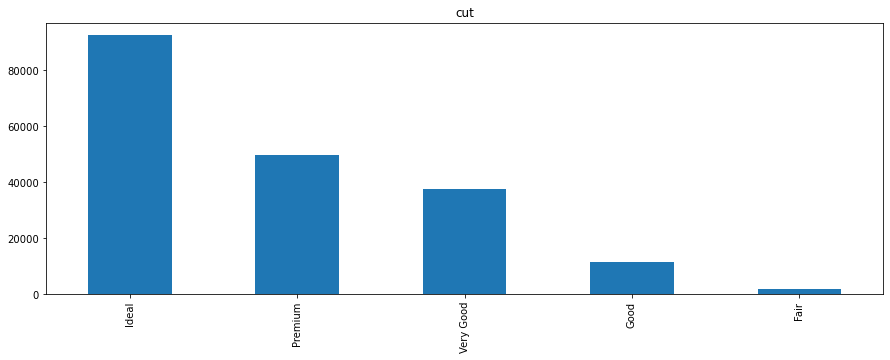

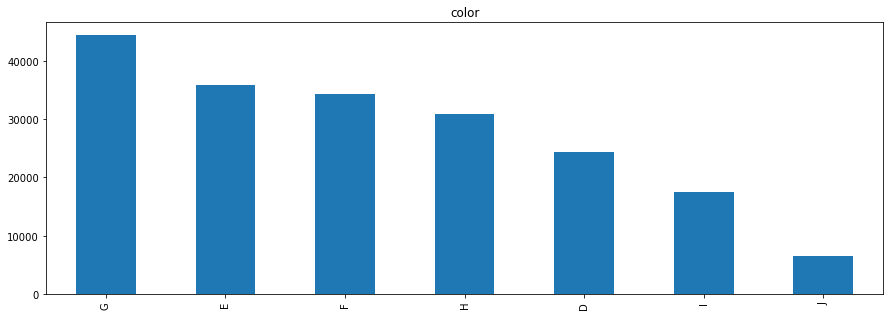

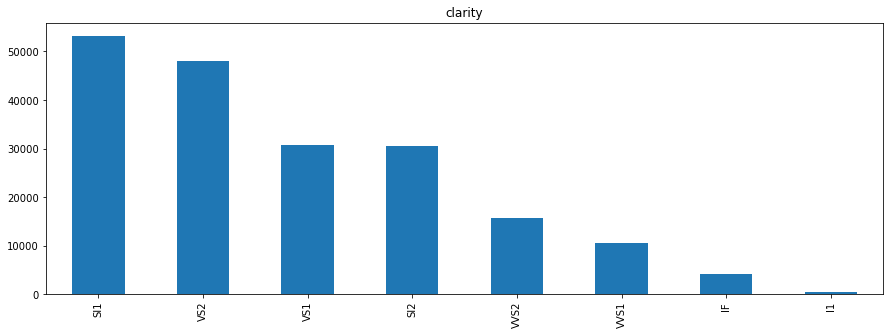

In [11]:
for col in object_cols:
  data[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

In [12]:
numeric_cols = [f for f in data.columns if data[f].dtype !="O"]  

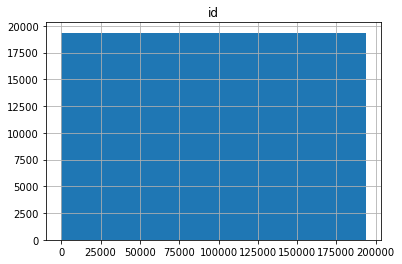

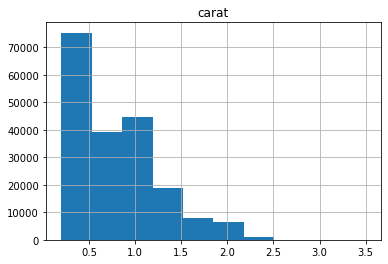

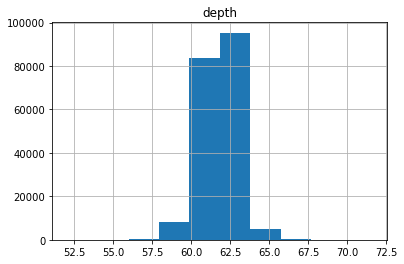

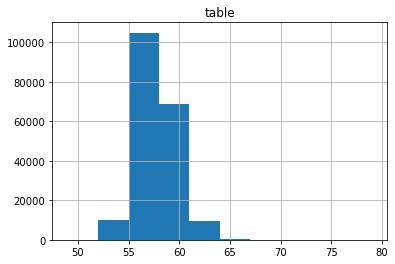

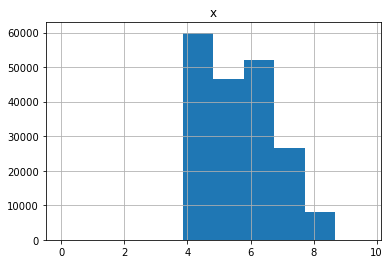

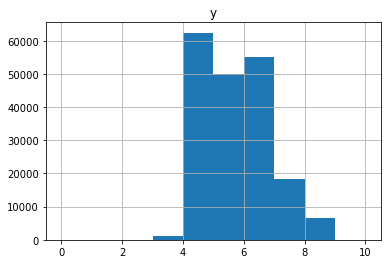

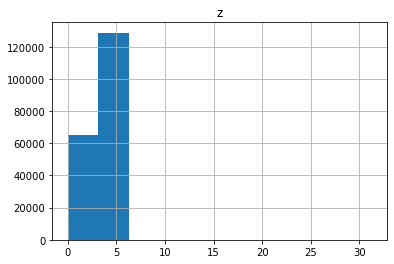

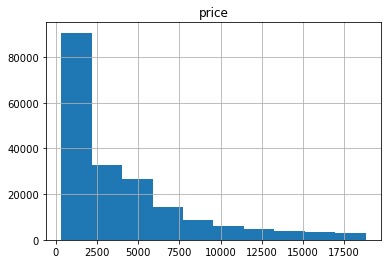

In [13]:
for col in numeric_cols:
  data[col].hist()
  plt.title(col)
  plt.show()

In [14]:
df = data.copy()

In [15]:
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

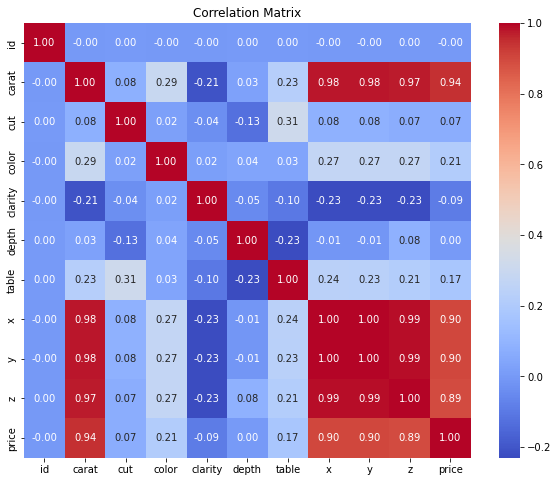

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
df = df.drop('id', axis=1)

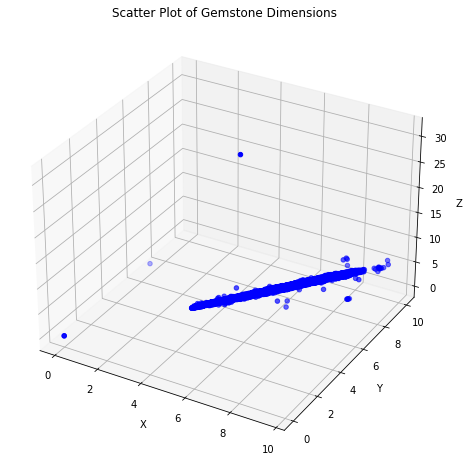

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the x, y, z dimensions from the DataFrame
x = df['x']
y = df['y']
z = df['z']

# Create a 3D scatter plot
ax.scatter(x, y, z, c='b', marker='o', s=20)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title for the plot
ax.set_title('Scatter Plot of Gemstone Dimensions')

plt.show()

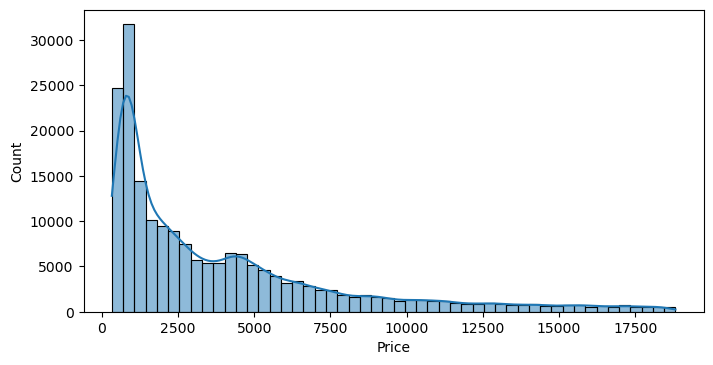

In [19]:
plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=df,
             x=df.price,
             bins=50,
             kde=True)
plt.xlabel('Price')
plt.show()

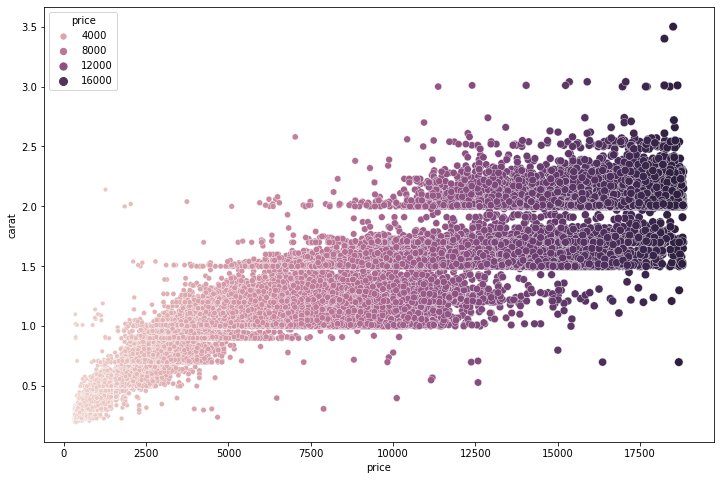

In [20]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="price", y="carat", hue="price", size="price");

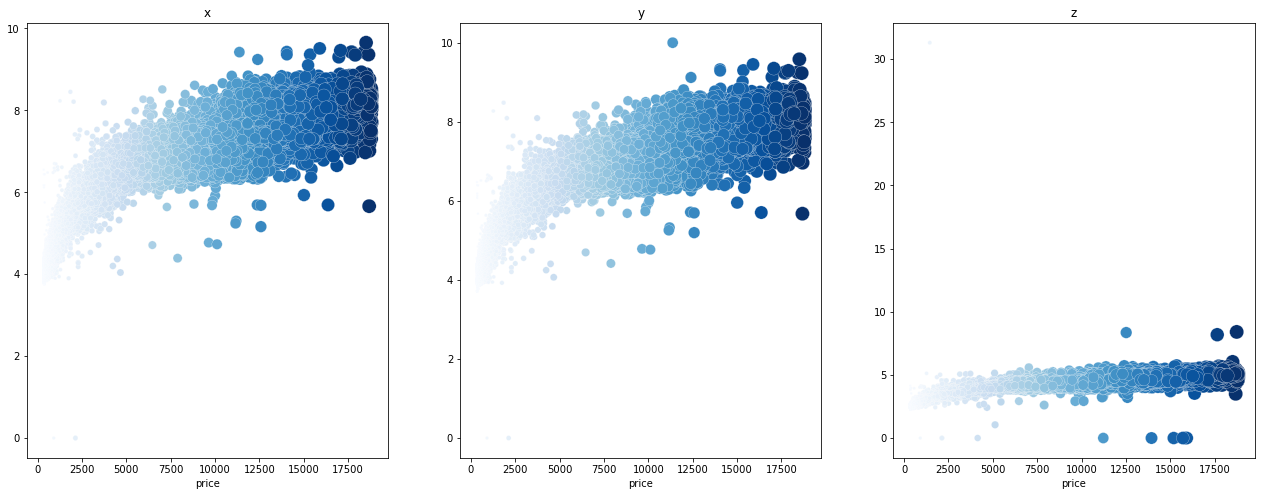

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

for i, col in enumerate(['x', 'y', 'z']):
  axes[i].set_title(col)
  sns.scatterplot(data=df, x="price", y=col,
                 ax=axes[i], hue='price', size='price', 
                 sizes=(5, 200), palette='Blues')
  axes[i].set_ylabel(None)
  axes[i].get_legend().remove()

# 1. Baseline Model

In [22]:
X = df.drop('price' ,axis=1)
y = df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "LightGBM Regressor": LGBMRegressor(),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "BaggingRegressor": BaggingRegressor(),
    "PoissonRegressor": PoissonRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
    "OrthogonalMatchingPursuitCV": OrthogonalMatchingPursuitCV(),
}

In [25]:
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "Training Time (s)": []
}


In [26]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    
    # Extract the first three digits after the comma (,) in mse and rmse
    mse_str = f'{mse:.3f}'
    rmse_str = f'{rmse:.3f}'
    
    # Append results to the dictionary
    results["Model"].append(model_name)
    results["MSE"].append(mse_str)
    results["RMSE"].append(rmse_str)
    results["Training Time (s)"].append(end_time - start_time)

# Create a DataFrame from the results dictionary
result1 = pd.DataFrame(results)

Learning rate set to 0.090822
0:	learn: 3702.2366201	total: 170ms	remaining: 2m 49s
1:	learn: 3403.9494465	total: 191ms	remaining: 1m 35s
2:	learn: 3129.0696467	total: 210ms	remaining: 1m 9s
3:	learn: 2880.2305117	total: 229ms	remaining: 57.1s
4:	learn: 2656.6021968	total: 249ms	remaining: 49.5s
5:	learn: 2446.7527934	total: 269ms	remaining: 44.6s
6:	learn: 2264.3900308	total: 291ms	remaining: 41.3s
7:	learn: 2095.8785478	total: 313ms	remaining: 38.8s
8:	learn: 1941.6191318	total: 335ms	remaining: 36.9s
9:	learn: 1809.2153650	total: 357ms	remaining: 35.3s
10:	learn: 1685.6104899	total: 377ms	remaining: 33.9s
11:	learn: 1575.9934087	total: 398ms	remaining: 32.8s
12:	learn: 1475.4833602	total: 422ms	remaining: 32.1s
13:	learn: 1385.7630598	total: 442ms	remaining: 31.1s
14:	learn: 1306.4620090	total: 460ms	remaining: 30.2s
15:	learn: 1235.2217620	total: 481ms	remaining: 29.6s
16:	learn: 1172.9736285	total: 511ms	remaining: 29.5s
17:	learn: 1117.5200947	total: 533ms	remaining: 29.1s
18:	le

165:	learn: 579.6142305	total: 3.29s	remaining: 16.6s
166:	learn: 579.3394143	total: 3.31s	remaining: 16.5s
167:	learn: 579.1614282	total: 3.33s	remaining: 16.5s
168:	learn: 579.1077145	total: 3.34s	remaining: 16.4s
169:	learn: 579.0113667	total: 3.35s	remaining: 16.4s
170:	learn: 578.9636225	total: 3.37s	remaining: 16.3s
171:	learn: 578.8128248	total: 3.38s	remaining: 16.3s
172:	learn: 578.6571634	total: 3.4s	remaining: 16.2s
173:	learn: 578.6111201	total: 3.41s	remaining: 16.2s
174:	learn: 578.5229248	total: 3.43s	remaining: 16.2s
175:	learn: 578.3448022	total: 3.44s	remaining: 16.1s
176:	learn: 578.2107946	total: 3.46s	remaining: 16.1s
177:	learn: 578.1053298	total: 3.47s	remaining: 16s
178:	learn: 577.9440831	total: 3.49s	remaining: 16s
179:	learn: 577.8193083	total: 3.51s	remaining: 16s
180:	learn: 577.7392982	total: 3.52s	remaining: 15.9s
181:	learn: 577.6360833	total: 3.54s	remaining: 15.9s
182:	learn: 577.5521455	total: 3.55s	remaining: 15.8s
183:	learn: 577.4799584	total: 3.56

322:	learn: 564.9877016	total: 5.74s	remaining: 12s
323:	learn: 564.8929886	total: 5.76s	remaining: 12s
324:	learn: 564.8309928	total: 5.78s	remaining: 12s
325:	learn: 564.7697566	total: 5.79s	remaining: 12s
326:	learn: 564.7247547	total: 5.81s	remaining: 12s
327:	learn: 564.6738458	total: 5.82s	remaining: 11.9s
328:	learn: 564.6398926	total: 5.84s	remaining: 11.9s
329:	learn: 564.5688996	total: 5.85s	remaining: 11.9s
330:	learn: 564.5082852	total: 5.87s	remaining: 11.9s
331:	learn: 564.4652702	total: 5.88s	remaining: 11.8s
332:	learn: 564.4239049	total: 5.9s	remaining: 11.8s
333:	learn: 564.3045452	total: 5.91s	remaining: 11.8s
334:	learn: 564.2686884	total: 5.93s	remaining: 11.8s
335:	learn: 564.1841875	total: 5.94s	remaining: 11.7s
336:	learn: 564.0730883	total: 5.96s	remaining: 11.7s
337:	learn: 563.9844289	total: 5.98s	remaining: 11.7s
338:	learn: 563.8828734	total: 5.99s	remaining: 11.7s
339:	learn: 563.8289243	total: 6.01s	remaining: 11.7s
340:	learn: 563.7872957	total: 6.02s	re

486:	learn: 555.4685198	total: 8.36s	remaining: 8.81s
487:	learn: 555.4206740	total: 8.38s	remaining: 8.79s
488:	learn: 555.3825968	total: 8.4s	remaining: 8.77s
489:	learn: 555.3322043	total: 8.41s	remaining: 8.76s
490:	learn: 555.2439122	total: 8.43s	remaining: 8.74s
491:	learn: 555.2037139	total: 8.45s	remaining: 8.72s
492:	learn: 555.1605267	total: 8.46s	remaining: 8.7s
493:	learn: 555.0737554	total: 8.48s	remaining: 8.68s
494:	learn: 555.0094107	total: 8.49s	remaining: 8.66s
495:	learn: 554.9643402	total: 8.51s	remaining: 8.64s
496:	learn: 554.9355858	total: 8.52s	remaining: 8.62s
497:	learn: 554.8947435	total: 8.54s	remaining: 8.6s
498:	learn: 554.8463879	total: 8.55s	remaining: 8.59s
499:	learn: 554.8400227	total: 8.57s	remaining: 8.57s
500:	learn: 554.8145038	total: 8.58s	remaining: 8.55s
501:	learn: 554.6997296	total: 8.6s	remaining: 8.53s
502:	learn: 554.6329620	total: 8.61s	remaining: 8.51s
503:	learn: 554.5657464	total: 8.63s	remaining: 8.49s
504:	learn: 554.5209274	total: 8

648:	learn: 547.7690916	total: 10.8s	remaining: 5.84s
649:	learn: 547.7312347	total: 10.8s	remaining: 5.82s
650:	learn: 547.6914567	total: 10.8s	remaining: 5.8s
651:	learn: 547.6196991	total: 10.8s	remaining: 5.78s
652:	learn: 547.5425408	total: 10.8s	remaining: 5.76s
653:	learn: 547.4677865	total: 10.9s	remaining: 5.75s
654:	learn: 547.4185120	total: 10.9s	remaining: 5.73s
655:	learn: 547.3608136	total: 10.9s	remaining: 5.71s
656:	learn: 547.3008919	total: 10.9s	remaining: 5.69s
657:	learn: 547.2562648	total: 10.9s	remaining: 5.68s
658:	learn: 547.2204842	total: 10.9s	remaining: 5.66s
659:	learn: 547.1888557	total: 11s	remaining: 5.64s
660:	learn: 547.1667195	total: 11s	remaining: 5.62s
661:	learn: 547.0957924	total: 11s	remaining: 5.61s
662:	learn: 547.0639792	total: 11s	remaining: 5.59s
663:	learn: 547.0167877	total: 11s	remaining: 5.57s
664:	learn: 546.9743273	total: 11s	remaining: 5.56s
665:	learn: 546.9483078	total: 11s	remaining: 5.54s
666:	learn: 546.8989716	total: 11.1s	remain

808:	learn: 540.8039506	total: 13.2s	remaining: 3.12s
809:	learn: 540.7657081	total: 13.2s	remaining: 3.1s
810:	learn: 540.7374217	total: 13.2s	remaining: 3.08s
811:	learn: 540.7048159	total: 13.2s	remaining: 3.07s
812:	learn: 540.6713525	total: 13.3s	remaining: 3.05s
813:	learn: 540.6662650	total: 13.3s	remaining: 3.03s
814:	learn: 540.6415389	total: 13.3s	remaining: 3.02s
815:	learn: 540.5462947	total: 13.3s	remaining: 3s
816:	learn: 540.5168156	total: 13.3s	remaining: 2.98s
817:	learn: 540.5022625	total: 13.3s	remaining: 2.97s
818:	learn: 540.4626778	total: 13.3s	remaining: 2.95s
819:	learn: 540.4312277	total: 13.4s	remaining: 2.93s
820:	learn: 540.4096955	total: 13.4s	remaining: 2.92s
821:	learn: 540.3862929	total: 13.4s	remaining: 2.9s
822:	learn: 540.3691307	total: 13.4s	remaining: 2.88s
823:	learn: 540.3194843	total: 13.4s	remaining: 2.87s
824:	learn: 540.2884683	total: 13.4s	remaining: 2.85s
825:	learn: 540.2336210	total: 13.5s	remaining: 2.83s
826:	learn: 540.2120045	total: 13

961:	learn: 535.9694148	total: 15.6s	remaining: 617ms
962:	learn: 535.9568953	total: 15.6s	remaining: 601ms
963:	learn: 535.9270654	total: 15.6s	remaining: 584ms
964:	learn: 535.9011368	total: 15.7s	remaining: 568ms
965:	learn: 535.8667004	total: 15.7s	remaining: 552ms
966:	learn: 535.8132152	total: 15.7s	remaining: 536ms
967:	learn: 535.8089456	total: 15.7s	remaining: 519ms
968:	learn: 535.7935669	total: 15.7s	remaining: 503ms
969:	learn: 535.7657740	total: 15.7s	remaining: 487ms
970:	learn: 535.7524977	total: 15.8s	remaining: 471ms
971:	learn: 535.7177470	total: 15.8s	remaining: 454ms
972:	learn: 535.6906040	total: 15.8s	remaining: 438ms
973:	learn: 535.6377173	total: 15.8s	remaining: 422ms
974:	learn: 535.5949120	total: 15.8s	remaining: 406ms
975:	learn: 535.5815971	total: 15.8s	remaining: 389ms
976:	learn: 535.5510985	total: 15.8s	remaining: 373ms
977:	learn: 535.5135221	total: 15.9s	remaining: 357ms
978:	learn: 535.4846384	total: 15.9s	remaining: 341ms
979:	learn: 535.4294072	tota

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuitCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_w

In [27]:
result1

,Model,MSE,RMSE,Training Time (s)
0,Linear Regression,1230427.747,1109.246,0.120467
1,XGBoost Regressor,339945.197,583.048,3.948784
2,CatBoost Regressor,328766.174,573.381,16.760496
3,LightGBM Regressor,331938.891,576.141,0.595020
4,HistGradientBoostingRegressor,332275.212,576.433,1.094242
5,GradientBoostingRegressor,412771.944,642.473,17.139925
6,RandomForestRegressor,368321.234,606.895,58.859249
7,ExtraTreesRegressor,381810.043,617.908,45.948895
8,KNeighborsRegressor,538264.180,733.665,0.481220
9,BaggingRegressor,401781.291,633.862,6.297820


# 2. Model with aceptable model with high correlation

In [28]:
df2 = df.copy()

In [29]:
df2 = df[['carat', 'x', 'y', 'z', 'price']]

In [30]:
X = df2.drop('price' ,axis=1)
y = df2['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
models = {
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'LightGBM Regressor': LGBMRegressor(),
    'HistGradientBoosting Regressor': HistGradientBoostingRegressor(),
    'GradientBoosting Regressor': GradientBoostingRegressor(),
    'Bagging Regressor ': BaggingRegressor(),
}

In [33]:
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "Training Time (s)": []
}

In [34]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    
    # Extract the first three digits after the comma (,) in mse and rmse
    mse_str = f'{mse:.3f}'
    rmse_str = f'{rmse:.3f}'
    
    # Append results to the dictionary
    results["Model"].append(model_name)
    results["MSE"].append(mse_str)
    results["RMSE"].append(rmse_str)
    results["Training Time (s)"].append(end_time - start_time)

# Create a DataFrame from the results dictionary
result2 = pd.DataFrame(results)

Learning rate set to 0.090822
0:	learn: 3700.5175031	total: 25.7ms	remaining: 25.7s
1:	learn: 3405.2084561	total: 41.2ms	remaining: 20.6s
2:	learn: 3137.5176124	total: 57.2ms	remaining: 19s
3:	learn: 2898.2903944	total: 73.1ms	remaining: 18.2s
4:	learn: 2682.1307156	total: 89.5ms	remaining: 17.8s
5:	learn: 2488.8268886	total: 105ms	remaining: 17.5s
6:	learn: 2316.2530305	total: 121ms	remaining: 17.2s
7:	learn: 2163.1932721	total: 137ms	remaining: 17s
8:	learn: 2027.1203058	total: 153ms	remaining: 16.8s
9:	learn: 1906.7830564	total: 169ms	remaining: 16.8s
10:	learn: 1799.9118468	total: 189ms	remaining: 17s
11:	learn: 1706.4032692	total: 207ms	remaining: 17.1s
12:	learn: 1624.7153666	total: 225ms	remaining: 17.1s
13:	learn: 1553.7718920	total: 245ms	remaining: 17.2s
14:	learn: 1492.2780807	total: 264ms	remaining: 17.4s
15:	learn: 1438.9522573	total: 283ms	remaining: 17.4s
16:	learn: 1393.4402765	total: 301ms	remaining: 17.4s
17:	learn: 1354.5347539	total: 320ms	remaining: 17.4s
18:	learn

154:	learn: 1130.7856540	total: 2.38s	remaining: 13s
155:	learn: 1130.6508288	total: 2.4s	remaining: 13s
156:	learn: 1130.6343689	total: 2.42s	remaining: 13s
157:	learn: 1130.6052420	total: 2.43s	remaining: 13s
158:	learn: 1130.5278861	total: 2.44s	remaining: 12.9s
159:	learn: 1130.3469774	total: 2.46s	remaining: 12.9s
160:	learn: 1130.2764898	total: 2.47s	remaining: 12.9s
161:	learn: 1130.1960391	total: 2.48s	remaining: 12.9s
162:	learn: 1130.1786320	total: 2.5s	remaining: 12.8s
163:	learn: 1130.0785400	total: 2.51s	remaining: 12.8s
164:	learn: 1130.0698688	total: 2.52s	remaining: 12.8s
165:	learn: 1130.0346084	total: 2.53s	remaining: 12.7s
166:	learn: 1129.9119561	total: 2.54s	remaining: 12.7s
167:	learn: 1129.8888473	total: 2.56s	remaining: 12.7s
168:	learn: 1129.7458746	total: 2.57s	remaining: 12.6s
169:	learn: 1129.6467885	total: 2.59s	remaining: 12.6s
170:	learn: 1129.5221530	total: 2.6s	remaining: 12.6s
171:	learn: 1129.4118410	total: 2.62s	remaining: 12.6s
172:	learn: 1129.3783

313:	learn: 1120.9684738	total: 4.57s	remaining: 9.99s
314:	learn: 1120.9465346	total: 4.58s	remaining: 9.97s
315:	learn: 1120.9410531	total: 4.6s	remaining: 9.96s
316:	learn: 1120.9372245	total: 4.61s	remaining: 9.94s
317:	learn: 1120.8706266	total: 4.63s	remaining: 9.92s
318:	learn: 1120.8664128	total: 4.64s	remaining: 9.9s
319:	learn: 1120.8274566	total: 4.65s	remaining: 9.89s
320:	learn: 1120.7856504	total: 4.67s	remaining: 9.87s
321:	learn: 1120.7106292	total: 4.68s	remaining: 9.85s
322:	learn: 1120.6629549	total: 4.69s	remaining: 9.83s
323:	learn: 1120.6222735	total: 4.7s	remaining: 9.81s
324:	learn: 1120.6148528	total: 4.71s	remaining: 9.79s
325:	learn: 1120.5999240	total: 4.73s	remaining: 9.78s
326:	learn: 1120.5599744	total: 4.74s	remaining: 9.75s
327:	learn: 1120.5477695	total: 4.75s	remaining: 9.74s
328:	learn: 1120.4415297	total: 4.77s	remaining: 9.72s
329:	learn: 1120.3750489	total: 4.78s	remaining: 9.71s
330:	learn: 1120.2872831	total: 4.79s	remaining: 9.69s
331:	learn: 1

465:	learn: 1114.5705109	total: 6.73s	remaining: 7.72s
466:	learn: 1114.5131050	total: 6.75s	remaining: 7.7s
467:	learn: 1114.5034697	total: 6.77s	remaining: 7.69s
468:	learn: 1114.4894975	total: 6.78s	remaining: 7.67s
469:	learn: 1114.4227432	total: 6.79s	remaining: 7.66s
470:	learn: 1114.3665618	total: 6.81s	remaining: 7.65s
471:	learn: 1114.3572577	total: 6.83s	remaining: 7.64s
472:	learn: 1114.3344826	total: 6.84s	remaining: 7.62s
473:	learn: 1114.2911405	total: 6.85s	remaining: 7.6s
474:	learn: 1114.2775647	total: 6.86s	remaining: 7.58s
475:	learn: 1114.2529976	total: 6.87s	remaining: 7.57s
476:	learn: 1114.2489626	total: 6.88s	remaining: 7.55s
477:	learn: 1114.2370627	total: 6.89s	remaining: 7.53s
478:	learn: 1114.2352202	total: 6.91s	remaining: 7.51s
479:	learn: 1114.1657397	total: 6.92s	remaining: 7.5s
480:	learn: 1114.1595976	total: 6.94s	remaining: 7.49s
481:	learn: 1114.1242449	total: 6.95s	remaining: 7.47s
482:	learn: 1114.0692525	total: 6.97s	remaining: 7.46s
483:	learn: 1

626:	learn: 1109.2130517	total: 9.13s	remaining: 5.43s
627:	learn: 1109.1649647	total: 9.14s	remaining: 5.42s
628:	learn: 1109.1101453	total: 9.16s	remaining: 5.4s
629:	learn: 1109.0795545	total: 9.18s	remaining: 5.39s
630:	learn: 1109.0779480	total: 9.19s	remaining: 5.37s
631:	learn: 1109.0292503	total: 9.2s	remaining: 5.36s
632:	learn: 1109.0191922	total: 9.22s	remaining: 5.34s
633:	learn: 1108.9707026	total: 9.23s	remaining: 5.33s
634:	learn: 1108.9659498	total: 9.25s	remaining: 5.32s
635:	learn: 1108.9223327	total: 9.27s	remaining: 5.3s
636:	learn: 1108.8803343	total: 9.28s	remaining: 5.29s
637:	learn: 1108.8767916	total: 9.29s	remaining: 5.27s
638:	learn: 1108.8161414	total: 9.31s	remaining: 5.26s
639:	learn: 1108.7822549	total: 9.33s	remaining: 5.25s
640:	learn: 1108.7584100	total: 9.35s	remaining: 5.24s
641:	learn: 1108.7557468	total: 9.36s	remaining: 5.22s
642:	learn: 1108.7526586	total: 9.38s	remaining: 5.21s
643:	learn: 1108.7493271	total: 9.39s	remaining: 5.19s
644:	learn: 1

781:	learn: 1104.4961070	total: 11.3s	remaining: 3.15s
782:	learn: 1104.4905335	total: 11.3s	remaining: 3.14s
783:	learn: 1104.4214275	total: 11.3s	remaining: 3.13s
784:	learn: 1104.3947534	total: 11.4s	remaining: 3.11s
785:	learn: 1104.3908918	total: 11.4s	remaining: 3.1s
786:	learn: 1104.3543571	total: 11.4s	remaining: 3.08s
787:	learn: 1104.3395492	total: 11.4s	remaining: 3.07s
788:	learn: 1104.3067859	total: 11.4s	remaining: 3.05s
789:	learn: 1104.2945680	total: 11.4s	remaining: 3.04s
790:	learn: 1104.2586655	total: 11.4s	remaining: 3.02s
791:	learn: 1104.2325835	total: 11.5s	remaining: 3.01s
792:	learn: 1104.2265382	total: 11.5s	remaining: 3s
793:	learn: 1104.1970173	total: 11.5s	remaining: 2.98s
794:	learn: 1104.1955829	total: 11.5s	remaining: 2.97s
795:	learn: 1104.1610145	total: 11.5s	remaining: 2.95s
796:	learn: 1104.1584463	total: 11.5s	remaining: 2.94s
797:	learn: 1104.1563866	total: 11.6s	remaining: 2.92s
798:	learn: 1104.1290959	total: 11.6s	remaining: 2.91s
799:	learn: 11

941:	learn: 1099.8495306	total: 13.7s	remaining: 843ms
942:	learn: 1099.8325919	total: 13.7s	remaining: 828ms
943:	learn: 1099.8232673	total: 13.7s	remaining: 814ms
944:	learn: 1099.8218891	total: 13.7s	remaining: 800ms
945:	learn: 1099.8148755	total: 13.8s	remaining: 786ms
946:	learn: 1099.7818761	total: 13.8s	remaining: 771ms
947:	learn: 1099.7539173	total: 13.8s	remaining: 757ms
948:	learn: 1099.7154748	total: 13.8s	remaining: 743ms
949:	learn: 1099.6872347	total: 13.8s	remaining: 728ms
950:	learn: 1099.6586772	total: 13.9s	remaining: 714ms
951:	learn: 1099.6395397	total: 13.9s	remaining: 699ms
952:	learn: 1099.6036621	total: 13.9s	remaining: 685ms
953:	learn: 1099.6019396	total: 13.9s	remaining: 670ms
954:	learn: 1099.5685319	total: 13.9s	remaining: 656ms
955:	learn: 1099.5605800	total: 13.9s	remaining: 641ms
956:	learn: 1099.5407491	total: 13.9s	remaining: 627ms
957:	learn: 1099.4795024	total: 14s	remaining: 612ms
958:	learn: 1099.4429105	total: 14s	remaining: 597ms
959:	learn: 10

In [35]:
result2

,Model,MSE,RMSE,Training Time (s)
0,XGBoost Regressor,1326365.969,1151.680,2.437461
1,CatBoost Regressor,1312401.695,1145.601,15.078953
2,LightGBM Regressor,1305474.803,1142.574,0.357833
3,HistGradientBoosting Regressor,1301765.223,1140.949,0.537927
4,GradientBoosting Regressor,1306472.797,1143.010,8.608416
5,Bagging Regressor,1679368.895,1295.905,2.708190


# 3. Model with aceptable model with low correlation

In [36]:
df3 = df[['cut', 'color', 'clarity', 'depth', 'table' ,'price']]

In [37]:
X = df3.drop('price' ,axis=1)
y = df3['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
models = {
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'LightGBM Regressor': LGBMRegressor(),
    'HistGradientBoosting Regressor': HistGradientBoostingRegressor(),
    'GradientBoosting Regressor': GradientBoostingRegressor(),
    'Bagging Regressor': BaggingRegressor(),
}

In [40]:
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "Training Time (s)": []
}

In [41]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    
    # Extract the first three digits after the comma (,) in mse and rmse
    mse_str = f'{mse:.3f}'
    rmse_str = f'{rmse:.3f}'
    
    # Append results to the dictionary
    results["Model"].append(model_name)
    results["MSE"].append(mse_str)
    results["RMSE"].append(rmse_str)
    results["Training Time (s)"].append(end_time - start_time)

# Create a DataFrame from the results dictionary
result3 = pd.DataFrame(results)

Learning rate set to 0.090822
0:	learn: 3998.1979888	total: 14.7ms	remaining: 14.6s
1:	learn: 3970.4712747	total: 29.8ms	remaining: 14.9s
2:	learn: 3945.0382483	total: 45.1ms	remaining: 15s
3:	learn: 3924.1227165	total: 60ms	remaining: 14.9s
4:	learn: 3906.3118422	total: 75.2ms	remaining: 15s
5:	learn: 3891.3953981	total: 90.3ms	remaining: 15s
6:	learn: 3878.8735875	total: 105ms	remaining: 14.9s
7:	learn: 3867.4852581	total: 119ms	remaining: 14.8s
8:	learn: 3856.2632265	total: 135ms	remaining: 14.9s
9:	learn: 3848.3875964	total: 150ms	remaining: 14.8s
10:	learn: 3841.6566442	total: 166ms	remaining: 14.9s
11:	learn: 3834.1253076	total: 183ms	remaining: 15.1s
12:	learn: 3827.2841590	total: 202ms	remaining: 15.3s
13:	learn: 3822.4453397	total: 218ms	remaining: 15.4s
14:	learn: 3817.0722946	total: 237ms	remaining: 15.6s
15:	learn: 3813.1705443	total: 257ms	remaining: 15.8s
16:	learn: 3808.8946113	total: 278ms	remaining: 16.1s
17:	learn: 3805.9775513	total: 295ms	remaining: 16.1s
18:	learn:

155:	learn: 3745.2948135	total: 2.34s	remaining: 12.7s
156:	learn: 3745.1683793	total: 2.36s	remaining: 12.7s
157:	learn: 3744.9485664	total: 2.37s	remaining: 12.6s
158:	learn: 3744.8637378	total: 2.38s	remaining: 12.6s
159:	learn: 3744.8137473	total: 2.4s	remaining: 12.6s
160:	learn: 3744.6127943	total: 2.41s	remaining: 12.6s
161:	learn: 3744.4908318	total: 2.42s	remaining: 12.5s
162:	learn: 3744.4068536	total: 2.44s	remaining: 12.5s
163:	learn: 3744.3656708	total: 2.45s	remaining: 12.5s
164:	learn: 3744.3259844	total: 2.46s	remaining: 12.5s
165:	learn: 3744.1489622	total: 2.48s	remaining: 12.5s
166:	learn: 3744.0754033	total: 2.49s	remaining: 12.4s
167:	learn: 3743.8984292	total: 2.51s	remaining: 12.4s
168:	learn: 3743.7829297	total: 2.52s	remaining: 12.4s
169:	learn: 3743.7485320	total: 2.53s	remaining: 12.4s
170:	learn: 3743.5623635	total: 2.55s	remaining: 12.4s
171:	learn: 3743.4945656	total: 2.56s	remaining: 12.3s
172:	learn: 3743.4169350	total: 2.58s	remaining: 12.3s
173:	learn:

312:	learn: 3732.9413561	total: 4.52s	remaining: 9.91s
313:	learn: 3732.9100335	total: 4.53s	remaining: 9.9s
314:	learn: 3732.8061708	total: 4.56s	remaining: 9.92s
315:	learn: 3732.7311504	total: 4.58s	remaining: 9.91s
316:	learn: 3732.6423788	total: 4.6s	remaining: 9.91s
317:	learn: 3732.5729287	total: 4.62s	remaining: 9.9s
318:	learn: 3732.5512039	total: 4.63s	remaining: 9.89s
319:	learn: 3732.5224529	total: 4.64s	remaining: 9.87s
320:	learn: 3732.5187052	total: 4.66s	remaining: 9.85s
321:	learn: 3732.4196074	total: 4.67s	remaining: 9.84s
322:	learn: 3732.4091378	total: 4.68s	remaining: 9.82s
323:	learn: 3732.3910223	total: 4.7s	remaining: 9.8s
324:	learn: 3732.3733909	total: 4.71s	remaining: 9.78s
325:	learn: 3732.3367760	total: 4.73s	remaining: 9.77s
326:	learn: 3732.2613233	total: 4.74s	remaining: 9.76s
327:	learn: 3732.2192181	total: 4.75s	remaining: 9.74s
328:	learn: 3732.1087062	total: 4.77s	remaining: 9.73s
329:	learn: 3732.0673606	total: 4.78s	remaining: 9.71s
330:	learn: 373

466:	learn: 3725.6018300	total: 6.7s	remaining: 7.65s
467:	learn: 3725.5614868	total: 6.72s	remaining: 7.64s
468:	learn: 3725.4853990	total: 6.73s	remaining: 7.62s
469:	learn: 3725.4589561	total: 6.75s	remaining: 7.61s
470:	learn: 3725.4025159	total: 6.76s	remaining: 7.59s
471:	learn: 3725.3773141	total: 6.78s	remaining: 7.58s
472:	learn: 3725.3475211	total: 6.79s	remaining: 7.57s
473:	learn: 3725.2797315	total: 6.8s	remaining: 7.55s
474:	learn: 3725.2639369	total: 6.82s	remaining: 7.54s
475:	learn: 3725.2082375	total: 6.83s	remaining: 7.52s
476:	learn: 3725.1664057	total: 6.85s	remaining: 7.51s
477:	learn: 3725.0535297	total: 6.87s	remaining: 7.5s
478:	learn: 3724.9988815	total: 6.88s	remaining: 7.49s
479:	learn: 3724.9498580	total: 6.9s	remaining: 7.47s
480:	learn: 3724.9245706	total: 6.91s	remaining: 7.46s
481:	learn: 3724.8829549	total: 6.93s	remaining: 7.45s
482:	learn: 3724.8510614	total: 6.94s	remaining: 7.43s
483:	learn: 3724.8088501	total: 6.96s	remaining: 7.42s
484:	learn: 37

621:	learn: 3719.6225484	total: 8.89s	remaining: 5.4s
622:	learn: 3719.5684437	total: 8.9s	remaining: 5.39s
623:	learn: 3719.5475564	total: 8.92s	remaining: 5.37s
624:	learn: 3719.5356495	total: 8.93s	remaining: 5.36s
625:	learn: 3719.5163998	total: 8.94s	remaining: 5.34s
626:	learn: 3719.4629162	total: 8.96s	remaining: 5.33s
627:	learn: 3719.4246036	total: 8.97s	remaining: 5.32s
628:	learn: 3719.3376195	total: 8.99s	remaining: 5.3s
629:	learn: 3719.2953016	total: 9s	remaining: 5.29s
630:	learn: 3719.2605017	total: 9.02s	remaining: 5.27s
631:	learn: 3719.2473824	total: 9.03s	remaining: 5.26s
632:	learn: 3719.1922637	total: 9.05s	remaining: 5.24s
633:	learn: 3719.1449258	total: 9.06s	remaining: 5.23s
634:	learn: 3719.1143334	total: 9.07s	remaining: 5.21s
635:	learn: 3719.0886407	total: 9.09s	remaining: 5.2s
636:	learn: 3719.0345052	total: 9.1s	remaining: 5.19s
637:	learn: 3718.9606168	total: 9.12s	remaining: 5.17s
638:	learn: 3718.9120157	total: 9.13s	remaining: 5.16s
639:	learn: 3718.8

782:	learn: 3714.1092632	total: 11.1s	remaining: 3.07s
783:	learn: 3714.0585930	total: 11.1s	remaining: 3.05s
784:	learn: 3714.0230555	total: 11.1s	remaining: 3.04s
785:	learn: 3714.0066964	total: 11.1s	remaining: 3.02s
786:	learn: 3713.9728113	total: 11.1s	remaining: 3.01s
787:	learn: 3713.9410980	total: 11.1s	remaining: 3s
788:	learn: 3713.8981490	total: 11.1s	remaining: 2.98s
789:	learn: 3713.8726941	total: 11.2s	remaining: 2.97s
790:	learn: 3713.8670101	total: 11.2s	remaining: 2.95s
791:	learn: 3713.8252059	total: 11.2s	remaining: 2.94s
792:	learn: 3713.7995131	total: 11.2s	remaining: 2.92s
793:	learn: 3713.7541949	total: 11.2s	remaining: 2.91s
794:	learn: 3713.7122307	total: 11.2s	remaining: 2.9s
795:	learn: 3713.6983693	total: 11.2s	remaining: 2.88s
796:	learn: 3713.6486189	total: 11.3s	remaining: 2.87s
797:	learn: 3713.6131059	total: 11.3s	remaining: 2.85s
798:	learn: 3713.5997111	total: 11.3s	remaining: 2.84s
799:	learn: 3713.5520653	total: 11.3s	remaining: 2.83s
800:	learn: 37

944:	learn: 3709.7210670	total: 13.2s	remaining: 769ms
945:	learn: 3709.6638343	total: 13.2s	remaining: 755ms
946:	learn: 3709.6597288	total: 13.2s	remaining: 741ms
947:	learn: 3709.6570312	total: 13.3s	remaining: 727ms
948:	learn: 3709.6271552	total: 13.3s	remaining: 713ms
949:	learn: 3709.6014962	total: 13.3s	remaining: 699ms
950:	learn: 3709.5975150	total: 13.3s	remaining: 685ms
951:	learn: 3709.5788186	total: 13.3s	remaining: 671ms
952:	learn: 3709.5475051	total: 13.3s	remaining: 657ms
953:	learn: 3709.5043224	total: 13.3s	remaining: 643ms
954:	learn: 3709.5041492	total: 13.4s	remaining: 629ms
955:	learn: 3709.4766972	total: 13.4s	remaining: 615ms
956:	learn: 3709.4648856	total: 13.4s	remaining: 601ms
957:	learn: 3709.4368805	total: 13.4s	remaining: 587ms
958:	learn: 3709.4233208	total: 13.4s	remaining: 573ms
959:	learn: 3709.4071323	total: 13.4s	remaining: 559ms
960:	learn: 3709.3749440	total: 13.4s	remaining: 545ms
961:	learn: 3709.3267350	total: 13.5s	remaining: 531ms
962:	learn

In [42]:
result3

,Model,MSE,RMSE,Training Time (s)
0,XGBoost Regressor,14210040.013,3769.621,2.111770
1,CatBoost Regressor,14143760.452,3760.819,14.365270
2,LightGBM Regressor,14136249.419,3759.820,0.244890
3,HistGradientBoosting Regressor,14147438.408,3761.308,0.813169
4,GradientBoosting Regressor,14283565.563,3779.360,6.726649
5,Bagging Regressor,16333334.257,4041.452,1.640808


# 4. Model with diamond volumns with strong model

In [43]:
df4 = df.copy()

In [44]:
df4

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,2,0,7,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,3,3,7,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,4,2,2,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,4,0,2,62.9,55.0,4.45,4.49,2.81,681


In [45]:
df4['volume'] = df4['x'] * df4['y'] * df4['z']

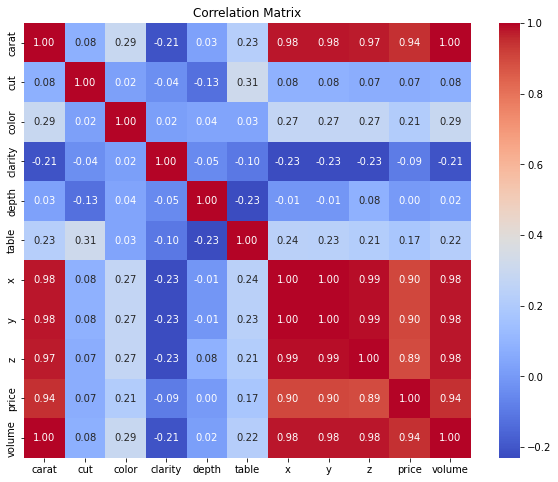

In [46]:
correlation_matrix = df4.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [47]:
X = df4.drop('price' ,axis=1)
y = df4['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
models = {
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'LightGBM Regressor': LGBMRegressor(),
    'HistGradientBoosting Regressor': HistGradientBoostingRegressor(),
    'GradientBoosting Regressor': GradientBoostingRegressor(),
    'Bagging Regressor': BaggingRegressor(),
}

In [50]:
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "Training Time (s)": []
}

In [51]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    
    # Extract the first three digits after the comma (,) in mse and rmse
    mse_str = f'{mse:.3f}'
    rmse_str = f'{rmse:.3f}'
    
    # Append results to the dictionary
    results["Model"].append(model_name)
    results["MSE"].append(mse_str)
    results["RMSE"].append(rmse_str)
    results["Training Time (s)"].append(end_time - start_time)

# Create a DataFrame from the results dictionary
result4 = pd.DataFrame(results)

Learning rate set to 0.090822
0:	learn: 3706.7119030	total: 16.6ms	remaining: 16.6s
1:	learn: 3405.5130620	total: 33.2ms	remaining: 16.6s
2:	learn: 3135.5374551	total: 48.8ms	remaining: 16.2s
3:	learn: 2883.2139420	total: 64.6ms	remaining: 16.1s
4:	learn: 2655.7021729	total: 80.7ms	remaining: 16.1s
5:	learn: 2446.6801086	total: 96.4ms	remaining: 16s
6:	learn: 2262.6291000	total: 112ms	remaining: 15.9s
7:	learn: 2096.6898982	total: 128ms	remaining: 15.9s
8:	learn: 1943.0633133	total: 146ms	remaining: 16s
9:	learn: 1806.9260603	total: 162ms	remaining: 16s
10:	learn: 1689.2562199	total: 180ms	remaining: 16.2s
11:	learn: 1582.1592010	total: 198ms	remaining: 16.3s
12:	learn: 1486.7372038	total: 215ms	remaining: 16.4s
13:	learn: 1400.9138802	total: 233ms	remaining: 16.4s
14:	learn: 1323.4580901	total: 252ms	remaining: 16.5s
15:	learn: 1252.3671793	total: 269ms	remaining: 16.5s
16:	learn: 1188.4893590	total: 285ms	remaining: 16.5s
17:	learn: 1130.2150015	total: 301ms	remaining: 16.4s
18:	lear

155:	learn: 581.4438268	total: 2.89s	remaining: 15.6s
156:	learn: 581.3033890	total: 2.91s	remaining: 15.6s
157:	learn: 581.1501089	total: 2.92s	remaining: 15.6s
158:	learn: 581.0036035	total: 2.95s	remaining: 15.6s
159:	learn: 580.8353036	total: 2.97s	remaining: 15.6s
160:	learn: 580.6245395	total: 2.99s	remaining: 15.6s
161:	learn: 580.4347692	total: 3.01s	remaining: 15.6s
162:	learn: 580.1756916	total: 3.02s	remaining: 15.5s
163:	learn: 580.0246343	total: 3.04s	remaining: 15.5s
164:	learn: 579.8509332	total: 3.06s	remaining: 15.5s
165:	learn: 579.7097160	total: 3.08s	remaining: 15.5s
166:	learn: 579.5414745	total: 3.1s	remaining: 15.5s
167:	learn: 579.4309618	total: 3.12s	remaining: 15.4s
168:	learn: 579.2603593	total: 3.13s	remaining: 15.4s
169:	learn: 579.1462309	total: 3.15s	remaining: 15.4s
170:	learn: 578.9145181	total: 3.18s	remaining: 15.4s
171:	learn: 578.7615514	total: 3.2s	remaining: 15.4s
172:	learn: 578.6414593	total: 3.23s	remaining: 15.4s
173:	learn: 578.4978761	total:

318:	learn: 563.5439506	total: 5.98s	remaining: 12.8s
319:	learn: 563.4382609	total: 6s	remaining: 12.7s
320:	learn: 563.3802670	total: 6.02s	remaining: 12.7s
321:	learn: 563.3071539	total: 6.04s	remaining: 12.7s
322:	learn: 563.1755931	total: 6.05s	remaining: 12.7s
323:	learn: 563.0904095	total: 6.07s	remaining: 12.7s
324:	learn: 563.0132120	total: 6.09s	remaining: 12.7s
325:	learn: 562.9219404	total: 6.11s	remaining: 12.6s
326:	learn: 562.8724280	total: 6.13s	remaining: 12.6s
327:	learn: 562.8255579	total: 6.15s	remaining: 12.6s
328:	learn: 562.7593660	total: 6.17s	remaining: 12.6s
329:	learn: 562.7054919	total: 6.19s	remaining: 12.6s
330:	learn: 562.6454819	total: 6.21s	remaining: 12.5s
331:	learn: 562.5810912	total: 6.23s	remaining: 12.5s
332:	learn: 562.5213260	total: 6.25s	remaining: 12.5s
333:	learn: 562.5010619	total: 6.26s	remaining: 12.5s
334:	learn: 562.4649136	total: 6.28s	remaining: 12.5s
335:	learn: 562.3879158	total: 6.3s	remaining: 12.4s
336:	learn: 562.2957995	total: 6

478:	learn: 553.7775366	total: 8.77s	remaining: 9.54s
479:	learn: 553.7304280	total: 8.78s	remaining: 9.52s
480:	learn: 553.6715138	total: 8.8s	remaining: 9.5s
481:	learn: 553.6068060	total: 8.82s	remaining: 9.48s
482:	learn: 553.5352957	total: 8.84s	remaining: 9.46s
483:	learn: 553.4383427	total: 8.85s	remaining: 9.44s
484:	learn: 553.3909465	total: 8.87s	remaining: 9.41s
485:	learn: 553.3151847	total: 8.88s	remaining: 9.39s
486:	learn: 553.2511952	total: 8.9s	remaining: 9.37s
487:	learn: 553.2428977	total: 8.91s	remaining: 9.35s
488:	learn: 553.1977675	total: 8.93s	remaining: 9.33s
489:	learn: 553.1563011	total: 8.94s	remaining: 9.31s
490:	learn: 553.1129675	total: 8.96s	remaining: 9.29s
491:	learn: 553.0267374	total: 8.98s	remaining: 9.27s
492:	learn: 552.9800148	total: 9s	remaining: 9.25s
493:	learn: 552.9676856	total: 9.02s	remaining: 9.23s
494:	learn: 552.9373985	total: 9.04s	remaining: 9.22s
495:	learn: 552.8829859	total: 9.05s	remaining: 9.2s
496:	learn: 552.8458749	total: 9.07

634:	learn: 545.9525524	total: 11.4s	remaining: 6.53s
635:	learn: 545.9305022	total: 11.4s	remaining: 6.51s
636:	learn: 545.8502413	total: 11.4s	remaining: 6.49s
637:	learn: 545.8211000	total: 11.4s	remaining: 6.47s
638:	learn: 545.7949662	total: 11.4s	remaining: 6.45s
639:	learn: 545.7632766	total: 11.4s	remaining: 6.43s
640:	learn: 545.7551999	total: 11.5s	remaining: 6.41s
641:	learn: 545.7228070	total: 11.5s	remaining: 6.39s
642:	learn: 545.6653810	total: 11.5s	remaining: 6.38s
643:	learn: 545.6058355	total: 11.5s	remaining: 6.36s
644:	learn: 545.5340086	total: 11.5s	remaining: 6.34s
645:	learn: 545.4627040	total: 11.5s	remaining: 6.32s
646:	learn: 545.3717468	total: 11.6s	remaining: 6.3s
647:	learn: 545.3532852	total: 11.6s	remaining: 6.29s
648:	learn: 545.3261900	total: 11.6s	remaining: 6.27s
649:	learn: 545.2530520	total: 11.6s	remaining: 6.25s
650:	learn: 545.2345832	total: 11.6s	remaining: 6.23s
651:	learn: 545.1889665	total: 11.6s	remaining: 6.22s
652:	learn: 545.1739127	total

792:	learn: 539.2791897	total: 14s	remaining: 3.65s
793:	learn: 539.2547019	total: 14s	remaining: 3.63s
794:	learn: 539.2543138	total: 14s	remaining: 3.61s
795:	learn: 539.1826625	total: 14s	remaining: 3.59s
796:	learn: 539.1481218	total: 14s	remaining: 3.57s
797:	learn: 539.0936060	total: 14s	remaining: 3.56s
798:	learn: 539.0756630	total: 14.1s	remaining: 3.54s
799:	learn: 539.0036676	total: 14.1s	remaining: 3.52s
800:	learn: 538.9458687	total: 14.1s	remaining: 3.5s
801:	learn: 538.9192847	total: 14.1s	remaining: 3.48s
802:	learn: 538.8942226	total: 14.1s	remaining: 3.46s
803:	learn: 538.8613788	total: 14.1s	remaining: 3.45s
804:	learn: 538.8180698	total: 14.2s	remaining: 3.43s
805:	learn: 538.7734938	total: 14.2s	remaining: 3.41s
806:	learn: 538.7402062	total: 14.2s	remaining: 3.39s
807:	learn: 538.7303363	total: 14.2s	remaining: 3.38s
808:	learn: 538.7235674	total: 14.2s	remaining: 3.36s
809:	learn: 538.6734221	total: 14.2s	remaining: 3.34s
810:	learn: 538.6019179	total: 14.2s	rema

946:	learn: 534.0706117	total: 16.4s	remaining: 917ms
947:	learn: 534.0644423	total: 16.4s	remaining: 900ms
948:	learn: 534.0258590	total: 16.4s	remaining: 883ms
949:	learn: 533.9562059	total: 16.5s	remaining: 866ms
950:	learn: 533.9113990	total: 16.5s	remaining: 849ms
951:	learn: 533.8670278	total: 16.5s	remaining: 832ms
952:	learn: 533.8325473	total: 16.5s	remaining: 815ms
953:	learn: 533.7460868	total: 16.5s	remaining: 797ms
954:	learn: 533.6889737	total: 16.6s	remaining: 780ms
955:	learn: 533.6735593	total: 16.6s	remaining: 763ms
956:	learn: 533.6195603	total: 16.6s	remaining: 745ms
957:	learn: 533.5729604	total: 16.6s	remaining: 728ms
958:	learn: 533.5179546	total: 16.6s	remaining: 711ms
959:	learn: 533.5148377	total: 16.6s	remaining: 693ms
960:	learn: 533.4793685	total: 16.7s	remaining: 676ms
961:	learn: 533.4337597	total: 16.7s	remaining: 658ms
962:	learn: 533.3773344	total: 16.7s	remaining: 641ms
963:	learn: 533.3526904	total: 16.7s	remaining: 624ms
964:	learn: 533.2928326	tota

In [52]:
result4

,Model,MSE,RMSE,Training Time (s)
0,XGBoost Regressor,342300.837,585.065,3.660914
1,CatBoost Regressor,329640.241,574.143,17.775647
2,LightGBM Regressor,331626.058,575.870,0.474308
3,HistGradientBoosting Regressor,333869.295,577.814,1.150762
4,GradientBoosting Regressor,411436.642,641.433,19.186928
5,Bagging Regressor,401457.395,633.607,7.393626


# 5. Model with diamond volume but high correlation

In [53]:
df5 = df4[['cut', 'color', 'clarity', 'depth', 'table' ,'volume','price']]

In [54]:
X = df5.drop('price' ,axis=1)
y = df5['price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
models = {
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'LightGBM Regressor': LGBMRegressor(),
    'HistGradientBoosting Regressor': HistGradientBoostingRegressor(),
    'GradientBoosting Regressor': GradientBoostingRegressor(),
    'Bagging Regressor': BaggingRegressor(),
}

In [57]:
results = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "Training Time (s)": []
}

In [58]:
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    
    # Extract the first three digits after the comma (,) in mse and rmse
    mse_str = f'{mse:.3f}'
    rmse_str = f'{rmse:.3f}'
    
    # Append results to the dictionary
    results["Model"].append(model_name)
    results["MSE"].append(mse_str)
    results["RMSE"].append(rmse_str)
    results["Training Time (s)"].append(end_time - start_time)

# Create a DataFrame from the results dictionary
result5 = pd.DataFrame(results)

Learning rate set to 0.090822
0:	learn: 3695.7441865	total: 15.7ms	remaining: 15.7s
1:	learn: 3398.3378305	total: 30.5ms	remaining: 15.2s
2:	learn: 3121.2853498	total: 45.9ms	remaining: 15.2s
3:	learn: 2876.5487300	total: 60ms	remaining: 14.9s
4:	learn: 2646.5746169	total: 75.1ms	remaining: 15s
5:	learn: 2438.5824417	total: 90.6ms	remaining: 15s
6:	learn: 2256.0878404	total: 106ms	remaining: 15s
7:	learn: 2091.7203994	total: 121ms	remaining: 15s
8:	learn: 1940.7451602	total: 137ms	remaining: 15.1s
9:	learn: 1805.7975078	total: 153ms	remaining: 15.2s
10:	learn: 1689.1811674	total: 169ms	remaining: 15.2s
11:	learn: 1577.2476526	total: 185ms	remaining: 15.2s
12:	learn: 1479.7747092	total: 201ms	remaining: 15.2s
13:	learn: 1390.2770892	total: 218ms	remaining: 15.4s
14:	learn: 1311.8523050	total: 242ms	remaining: 15.9s
15:	learn: 1239.6726083	total: 257ms	remaining: 15.8s
16:	learn: 1176.3321192	total: 272ms	remaining: 15.7s
17:	learn: 1120.5993244	total: 286ms	remaining: 15.6s
18:	learn: 1

157:	learn: 587.9969775	total: 2.35s	remaining: 12.5s
158:	learn: 587.7044615	total: 2.37s	remaining: 12.5s
159:	learn: 587.5447336	total: 2.39s	remaining: 12.5s
160:	learn: 587.3811841	total: 2.4s	remaining: 12.5s
161:	learn: 587.2075915	total: 2.41s	remaining: 12.5s
162:	learn: 587.0829830	total: 2.43s	remaining: 12.5s
163:	learn: 586.9509453	total: 2.44s	remaining: 12.4s
164:	learn: 586.7672422	total: 2.46s	remaining: 12.4s
165:	learn: 586.6423736	total: 2.47s	remaining: 12.4s
166:	learn: 586.5167521	total: 2.48s	remaining: 12.4s
167:	learn: 586.2772389	total: 2.5s	remaining: 12.4s
168:	learn: 586.0535401	total: 2.51s	remaining: 12.3s
169:	learn: 585.9355189	total: 2.52s	remaining: 12.3s
170:	learn: 585.8120503	total: 2.54s	remaining: 12.3s
171:	learn: 585.5184173	total: 2.56s	remaining: 12.3s
172:	learn: 585.4139756	total: 2.57s	remaining: 12.3s
173:	learn: 585.2885816	total: 2.59s	remaining: 12.3s
174:	learn: 585.1734670	total: 2.6s	remaining: 12.3s
175:	learn: 585.0390160	total: 

323:	learn: 571.6077102	total: 4.74s	remaining: 9.88s
324:	learn: 571.5739169	total: 4.75s	remaining: 9.87s
325:	learn: 571.4765945	total: 4.76s	remaining: 9.85s
326:	learn: 571.4554165	total: 4.78s	remaining: 9.84s
327:	learn: 571.3908120	total: 4.79s	remaining: 9.82s
328:	learn: 571.3318679	total: 4.81s	remaining: 9.8s
329:	learn: 571.2680749	total: 4.82s	remaining: 9.79s
330:	learn: 571.2029155	total: 4.84s	remaining: 9.78s
331:	learn: 571.1415380	total: 4.85s	remaining: 9.76s
332:	learn: 571.1071166	total: 4.86s	remaining: 9.74s
333:	learn: 571.0483447	total: 4.88s	remaining: 9.72s
334:	learn: 570.9619063	total: 4.89s	remaining: 9.71s
335:	learn: 570.9107696	total: 4.9s	remaining: 9.69s
336:	learn: 570.8814086	total: 4.92s	remaining: 9.67s
337:	learn: 570.8129861	total: 4.93s	remaining: 9.66s
338:	learn: 570.7513889	total: 4.95s	remaining: 9.65s
339:	learn: 570.7120959	total: 4.97s	remaining: 9.64s
340:	learn: 570.6956139	total: 4.98s	remaining: 9.63s
341:	learn: 570.6166532	total:

478:	learn: 564.5812491	total: 6.92s	remaining: 7.52s
479:	learn: 564.5485790	total: 6.93s	remaining: 7.51s
480:	learn: 564.4994535	total: 6.94s	remaining: 7.49s
481:	learn: 564.4623655	total: 6.96s	remaining: 7.48s
482:	learn: 564.4153252	total: 6.97s	remaining: 7.46s
483:	learn: 564.3776691	total: 6.99s	remaining: 7.45s
484:	learn: 564.3458152	total: 7s	remaining: 7.43s
485:	learn: 564.2967462	total: 7.01s	remaining: 7.42s
486:	learn: 564.2582141	total: 7.03s	remaining: 7.4s
487:	learn: 564.2324504	total: 7.04s	remaining: 7.39s
488:	learn: 564.2061909	total: 7.05s	remaining: 7.37s
489:	learn: 564.1653801	total: 7.07s	remaining: 7.36s
490:	learn: 564.1099127	total: 7.08s	remaining: 7.34s
491:	learn: 564.0989382	total: 7.1s	remaining: 7.33s
492:	learn: 564.0925176	total: 7.11s	remaining: 7.32s
493:	learn: 564.0298298	total: 7.13s	remaining: 7.3s
494:	learn: 564.0195984	total: 7.15s	remaining: 7.29s
495:	learn: 563.9817568	total: 7.16s	remaining: 7.28s
496:	learn: 563.9674519	total: 7.1

633:	learn: 559.4773602	total: 9.09s	remaining: 5.25s
634:	learn: 559.4099185	total: 9.11s	remaining: 5.24s
635:	learn: 559.3730450	total: 9.12s	remaining: 5.22s
636:	learn: 559.3484317	total: 9.14s	remaining: 5.21s
637:	learn: 559.3418778	total: 9.15s	remaining: 5.19s
638:	learn: 559.3078954	total: 9.16s	remaining: 5.18s
639:	learn: 559.2781529	total: 9.18s	remaining: 5.16s
640:	learn: 559.2518511	total: 9.19s	remaining: 5.15s
641:	learn: 559.2446746	total: 9.2s	remaining: 5.13s
642:	learn: 559.2218401	total: 9.21s	remaining: 5.12s
643:	learn: 559.1793987	total: 9.23s	remaining: 5.1s
644:	learn: 559.1654489	total: 9.24s	remaining: 5.08s
645:	learn: 559.1318942	total: 9.26s	remaining: 5.07s
646:	learn: 559.1216900	total: 9.27s	remaining: 5.06s
647:	learn: 559.0751559	total: 9.28s	remaining: 5.04s
648:	learn: 559.0614034	total: 9.3s	remaining: 5.03s
649:	learn: 559.0209100	total: 9.31s	remaining: 5.01s
650:	learn: 559.0154240	total: 9.33s	remaining: 5s
651:	learn: 559.0095353	total: 9.3

788:	learn: 555.5623829	total: 11.3s	remaining: 3.02s
789:	learn: 555.5397054	total: 11.3s	remaining: 3s
790:	learn: 555.5075268	total: 11.3s	remaining: 2.99s
791:	learn: 555.4746221	total: 11.3s	remaining: 2.97s
792:	learn: 555.4594337	total: 11.3s	remaining: 2.96s
793:	learn: 555.4282445	total: 11.4s	remaining: 2.94s
794:	learn: 555.4067611	total: 11.4s	remaining: 2.93s
795:	learn: 555.3736307	total: 11.4s	remaining: 2.92s
796:	learn: 555.3661946	total: 11.4s	remaining: 2.9s
797:	learn: 555.3325475	total: 11.4s	remaining: 2.89s
798:	learn: 555.3140118	total: 11.4s	remaining: 2.87s
799:	learn: 555.2980077	total: 11.4s	remaining: 2.86s
800:	learn: 555.2308082	total: 11.5s	remaining: 2.85s
801:	learn: 555.2210687	total: 11.5s	remaining: 2.83s
802:	learn: 555.1903860	total: 11.5s	remaining: 2.82s
803:	learn: 555.1680259	total: 11.5s	remaining: 2.8s
804:	learn: 555.1582746	total: 11.5s	remaining: 2.79s
805:	learn: 555.1274751	total: 11.5s	remaining: 2.77s
806:	learn: 555.0921312	total: 11

953:	learn: 551.7910208	total: 13.7s	remaining: 659ms
954:	learn: 551.7836148	total: 13.7s	remaining: 645ms
955:	learn: 551.7480529	total: 13.7s	remaining: 630ms
956:	learn: 551.7121554	total: 13.7s	remaining: 616ms
957:	learn: 551.6948251	total: 13.7s	remaining: 602ms
958:	learn: 551.6805354	total: 13.7s	remaining: 587ms
959:	learn: 551.6631346	total: 13.7s	remaining: 573ms
960:	learn: 551.6110756	total: 13.8s	remaining: 559ms
961:	learn: 551.6092346	total: 13.8s	remaining: 544ms
962:	learn: 551.5961516	total: 13.8s	remaining: 530ms
963:	learn: 551.5798114	total: 13.8s	remaining: 516ms
964:	learn: 551.5733493	total: 13.8s	remaining: 501ms
965:	learn: 551.5484996	total: 13.8s	remaining: 487ms
966:	learn: 551.5217436	total: 13.8s	remaining: 472ms
967:	learn: 551.4980631	total: 13.9s	remaining: 458ms
968:	learn: 551.4580139	total: 13.9s	remaining: 444ms
969:	learn: 551.4382326	total: 13.9s	remaining: 430ms
970:	learn: 551.3893729	total: 13.9s	remaining: 415ms
971:	learn: 551.3539875	tota

In [59]:
result5

,Model,MSE,RMSE,Training Time (s)
0,XGBoost Regressor,368334.808,606.906,3.169875
1,CatBoost Regressor,360326.077,600.272,14.728047
2,LightGBM Regressor,369688.326,608.020,0.297741
3,HistGradientBoosting Regressor,367160.962,605.938,0.844434
4,GradientBoosting Regressor,438811.318,662.428,11.399232
5,Bagging Regressor,438177.422,661.950,4.319060


# 6. XGB Model with adjustment and diamond volume 

In [60]:
df6 = df4.copy()

In [61]:
X = df6.drop('price' ,axis=1)
y = df6['price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
xgb_best_params1 = {
    'learning_rate': 0.1,
    'n_estimators': 200,
    'max_depth': 4,
    'min_child_weight': 2,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

In [85]:
objective = 'reg:squarederror'
# Create an XGBRegressor with the best parameters and objective function
xgb = XGBRegressor(**xgb_best_params1, objective=objective)

In [86]:
# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

In [87]:
# Calculate RMSE
rmse_xgb1 = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse_xgb1)

RMSE: 586.6179716691615


In [88]:
# Define adjusted parameters
xgb_best_params2 = {
    'learning_rate': 0.05,  # Reduced learning rate
    'n_estimators': 400,    # Increased number of trees
    'max_depth': 6,        # Adjusted max depth
    'min_child_weight': 1, # Adjusted min child weight
    'subsample': 0.8,      # Slightly reduced subsample
    'colsample_bytree': 0.8 # Slightly reduced colsample_bytree
}

In [89]:
# Create an XGBRegressor with the adjusted parameters
xgb = XGBRegressor(**xgb_best_params2, objective=objective)

In [90]:
# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

In [91]:
# Calculate RMSE
rmse_xgb2 = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse_xgb2)

RMSE: 579.2923706812811


# 7. Catboost Model with adjustment anddiamond volume 

In [92]:
# Define the parameters for CatBoost
best_params_catboost = {
    'learning_rate': 0.05,
    'n_estimators': 400,
    'depth': 6,               # Equivalent to max_depth in XGBoost
    'min_child_samples': 1,  # Equivalent to min_child_weight in XGBoost
    'subsample': 0.8,
    'colsample_bylevel': 0.8 # Equivalent to colsample_bytree in XGBoost
}

In [93]:
# Create a CatBoostRegressor with the specified parameters
catboost = CatBoostRegressor(**best_params_catboost, verbose=0)

In [94]:
# Fit the model to the training data
catboost.fit(X_train, y_train)

# Predict on the test data
y_pred_catboost = catboost.predict(X_test)

In [95]:
# Calculate RMSE for CatBoost
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))

print("RMSE:", rmse_catboost)

RMSE: 578.1870793789583


# 8. LGBM Model with adjustment anddiamond volume 

In [96]:
# Define the parameters for LightGBM
best_params_lightgbm = {
    'learning_rate': 0.05,
    'n_estimators': 400,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

In [98]:
# Create a LightGBM Regressor with the specified parameters
lightgbm = LGBMRegressor(**best_params_lightgbm)

In [99]:
# Fit the model to the training data
lightgbm.fit(X_train, y_train)

# Predict on the test data
y_pred_lightgbm = lightgbm.predict(X_test)

In [100]:
# Calculate RMSE for LightGBM
rmse_lightgbm = np.sqrt(mean_squared_error(y_test, y_pred_lightgbm))

print("RMSE:", rmse_lightgbm)

RMSE: 577.3569517989616


# 9. Catboost model with baseline and adjustment parameter

In [101]:
X = df.drop('price' ,axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
catboost.fit(X_train, y_train)

# Predict on the test data
y_pred_catboost = catboost.predict(X_test)

In [104]:
rmse_catboost2 = np.sqrt(mean_squared_error(y_test, y_pred_catboost))

print("RMSE:", rmse_catboost2)

RMSE: 593.1154583125804


# 9. Conclusion

- Model catboost regressor by using baseline data gives the lowest `RMSE = 573.381`